# Exploratory Data Analysis (EDA)

In this notebook, we will perform Exploratory Data Analysis (EDA) on the dataset obtained from [Luke Barousse's Hugging Face repository](https://huggingface.co/lukebarousse). The goal of this notebook is to clean and prepare the data for further analysis, focusing on data jobs. We will filter the dataset for Pakistan and a set of comparison countries, then save the results to CSV files for further analysis.

### Steps:
1. Import the dataset.
2. Clean the data by removing duplicates and filtering for data-related jobs.
3. Prepare and save two subsets of the data:
   - Jobs in Pakistan
   - Jobs in comparison countries (Turkey, Bangladesh, Nigeria, Egypt)


## 1. IMPORT THE DATASET

In [45]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# get the required dataset
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


## 2. Explore and Clean 

In [46]:
#check for unique values in job_title_short
df['job_title_short'].unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

There are jobs which are not directly realated to data. We will only include the data rows.

In [47]:

# Define a regular expression pattern to match "Data", "Analyst", or "Machine Learning" in job titles
pattern = r'(Data|Analyst|Machine Learning)'

# Filter the DataFrame based on 'job_title_short' containing 'Data', 'Analyst', or 'Machine Learning'
df = df[df['job_title_short'].str.contains(pattern, case=False, na=False)]

# Check the result
print(df.job_title_short.unique())

['Senior Data Engineer' 'Data Analyst' 'Data Engineer' 'Business Analyst'
 'Data Scientist' 'Machine Learning Engineer' 'Senior Data Analyst'
 'Senior Data Scientist']


In [48]:
#check for na values specifically in job_country
print(df.isna().sum())
df= df.dropna(subset=['job_country'])
print(".............................................")
print(df.isna().sum())


job_title_short               0
job_title                     1
job_location                998
job_via                       8
job_schedule_type         12049
job_work_from_home            0
search_location               0
job_posted_date               0
job_no_degree_mention         0
job_health_insurance          0
job_country                  30
salary_rate              696092
salary_year_avg          707010
salary_hour_avg          717944
company_name                 15
job_skills               106414
job_type_skills          106414
dtype: int64
.............................................
job_title_short               0
job_title                     0
job_location                997
job_via                       8
job_schedule_type         12048
job_work_from_home            0
search_location               0
job_posted_date               0
job_no_degree_mention         0
job_health_insurance          0
job_country                   0
salary_rate              696062
salary_year_a

There were 30 posting without any specifc country associated.

We know that companies post same jobs on multiple sites, spamming our dataset. If the same job posting has same job_tite (long) and company name, we will consider this as same job and dop from further analysis.

In [49]:
#handling same job posted on multiple sites
length_df=len(df)
lenght_spam_removed_df=len(df.drop_duplicates(subset=['job_title','company_name']))

print('There were',length_df-lenght_spam_removed_df, 'duplicated job posting in multiple sites')

#Remove spams
df=df.drop_duplicates(subset=['job_title','company_name'])


There were 266847 duplicated job posting in multiple sites


Removed 266847 duplicated jobs

In [50]:
#check datatypes
df.dtypes

job_title_short           object
job_title                 object
job_location              object
job_via                   object
job_schedule_type         object
job_work_from_home          bool
search_location           object
job_posted_date           object
job_no_degree_mention       bool
job_health_insurance        bool
job_country               object
salary_rate               object
salary_year_avg          float64
salary_hour_avg          float64
company_name              object
job_skills                object
job_type_skills           object
dtype: object

In [51]:
#check data types of job_skills
unique_types = df['job_skills'].apply(type).unique()
unique_types


array([<class 'NoneType'>, <class 'str'>], dtype=object)

job_skills is shown as object(STRING) but it contains multiple skills and can be converted to list for skill demand analysis. Also, job_posted_date has incorrect datatype.

In [52]:
#cleaning data
import ast
def convert_job_skills(x):
    '''Convert string to list'''
    try:
        if pd.notna(x):
            return ast.literal_eval(x)
        else:
            return x
    except (ValueError, SyntaxError):
        return x

df['job_skills'] = df['job_skills'].apply(convert_job_skills)

# Convert 'job_posted_date' column to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.dtypes

job_title_short                  object
job_title                        object
job_location                     object
job_via                          object
job_schedule_type                object
job_work_from_home                 bool
search_location                  object
job_posted_date          datetime64[ns]
job_no_degree_mention              bool
job_health_insurance               bool
job_country                      object
salary_rate                      object
salary_year_avg                 float64
salary_hour_avg                 float64
company_name                     object
job_skills                       object
job_type_skills                  object
dtype: object

In [53]:
#confim the conversion to list 
unique_types = df['job_skills'].apply(type).unique()
unique_types

array([<class 'NoneType'>, <class 'list'>], dtype=object)

It is confirmed that job_skills columns has been changed to list. (NoneType is for job postings without job_skills mentioned)

## 3. Prepare and save

Will only filter for comparison countries.

Basic Statistics for Comparison Countries:
            salary_year_avg          job_title_short
                       mean      std           count
job_country                                         
Bangladesh          42750.0  37123.0             186
Egypt               75847.4  19420.0            1794
Nigeria            100741.1  34693.0             703
Pakistan            69287.5  27970.0            1371
Turkey              94692.6  32394.0             903
Cleaned DataFrame for comparison countries saved to 'df_comparison_countries.csv'.


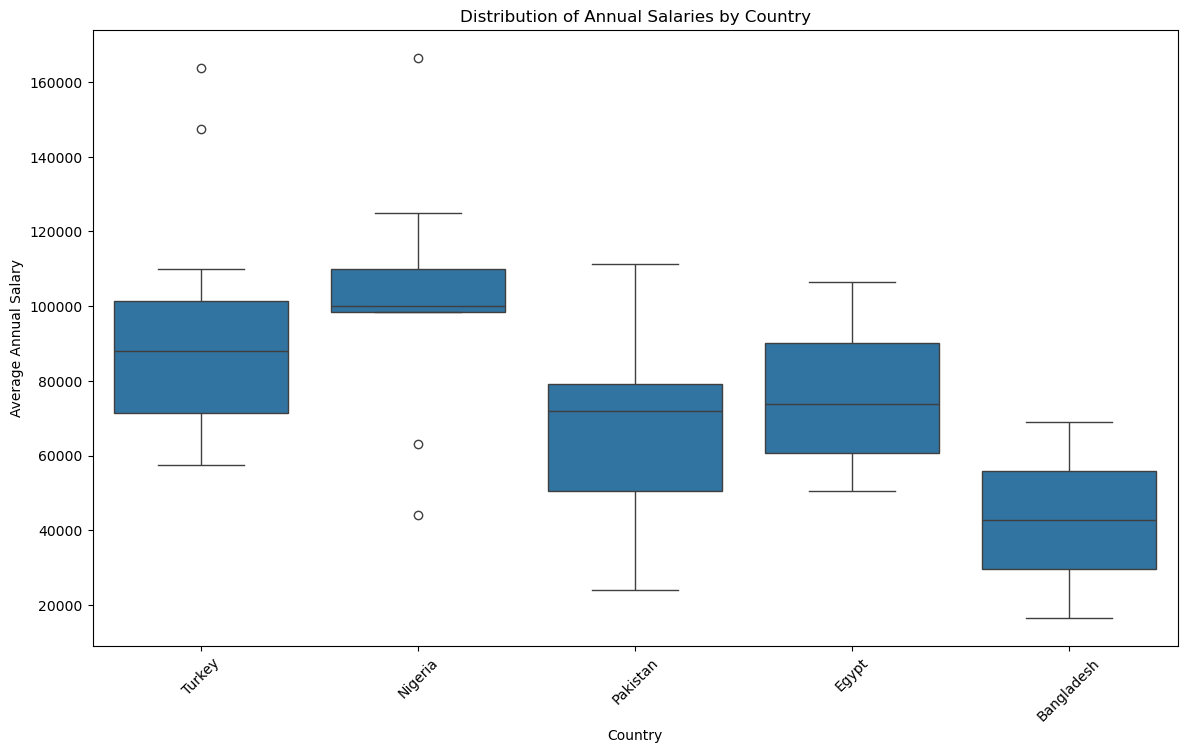

In [57]:
# Define the countries for comparison
comparison_countries = ['Pakistan', 'Turkey', 'Bangladesh', 'Nigeria', 'Egypt']

# Filter the DataFrame for these countries
df_comparison_countries = df[df['job_country'].isin(comparison_countries)]

# Display basic statistics for the selected countries
print("Basic Statistics for Comparison Countries:")
country_salary_stats = df_comparison_countries.groupby('job_country').agg({
    'salary_year_avg': ['mean', 'std'],
    'job_title_short': 'count'
})

# Rounding 'mean' and 'std' columns for 'salary_year_avg'
country_salary_stats[('salary_year_avg', 'mean')] = country_salary_stats[('salary_year_avg', 'mean')].round(1)
country_salary_stats[('salary_year_avg', 'std')] = country_salary_stats[('salary_year_avg', 'std')].round()

print(country_salary_stats)

# Save the cleaned DataFrame for comparison countries
df_comparison_countries.to_csv('df_comparison_countries.csv', index=False, header=True)

print(f"Cleaned DataFrame for comparison countries saved to 'df_comparison_countries.csv'.")

#make boxplot to visualize
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_comparison_countries, x='job_country', y='salary_year_avg')
plt.title('Distribution of Annual Salaries by Country')
plt.xlabel('Country')
plt.ylabel('Average Annual Salary')
plt.xticks(rotation=45)
plt.show()

This visualization seems to be non representative of respective coutries. 

In [55]:
# Iterate over each country and print the number of non-null salary rows
for country in comparison_countries:
    country_df = df[df['job_country'] == country]
    non_null_count = country_df['salary_year_avg'].notnull().sum()
    print(f"{country} has {non_null_count} non-null salary rows.")


Pakistan has 10 non-null salary rows.
Turkey has 12 non-null salary rows.
Bangladesh has 2 non-null salary rows.
Nigeria has 9 non-null salary rows.
Egypt has 10 non-null salary rows.


We can not do any meaningfull analysis with this amout of available data

Filter only for Pakistan

In [56]:
# Filter the DataFrame for Pakistan
df_pakistan = df[df['job_country'] == 'Pakistan']
# Save the cleaned DataFrame for Pakistan
df_pakistan.to_csv('df_pak.csv', index=False, header=True)